# Parson's Figure Recreation Using CMIP6 Data

In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Loading in data

In [3]:
cat = pd.read_csv('/data/keeling/a/cristi/a/esm_data/cmip6_catalog.csv')
cat

,activity_id,branch_method,branch_time_in_child,branch_time_in_parent,experiment,experiment_id,frequency,grid,grid_label,institution_id,...,standard_name,long_name,units,vertical_levels,init_year,start_time,end_time,time_range,path,version
0,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upward_latent_heat_flux,Surface Upward Latent Heat Flux,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
1,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upward_sensible_heat_flux,Surface Upward Sensible Heat Flux,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
2,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_downwelling_longwave_flux_in_air,Surface Downwelling Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
3,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upwelling_longwave_flux_in_air,Surface Upwelling Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
4,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,toa_outgoing_longwave_flux,TOA Outgoing Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,surface_downwelling_shortwave_flux_in_air,Surface Downwelling Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11430,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,toa_incoming_shortwave_flux,TOA Incident Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11431,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,surface_upwelling_shortwave_flux_in_air,Surface Upwelling Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11432,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,toa_outgoing_shortwave_flux,TOA Outgoing Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0


## Control Data

In [10]:
path = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control'))].drop_duplicates('source_id').head(20)['path'].to_list()
path

['/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM2/piControl/r1i1p1f1/tas_Amon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/ACCESS-ESM1-5/piControl/r1i1p1f1/tas_Amon_ACCESS-ESM1-5_piControl_r1i1p1f1_gn_010101-060012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/AWI-CM-1-1-MR/piControl/r1i1p1f1/tas_Amon_AWI-CM-1-1-MR_piControl_r1i1p1f1_gn_240101-290012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/AWI-ESM-1-1-LR/piControl/r1i1p1f1/tas_Amon_AWI-ESM-1-1-LR_piControl_r1i1p1f1_gn_195301-193912.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/BCC-CSM2-MR/piControl/r1i1p1f1/tas_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/BCC-ESM1/piControl/r1i1p1f1/tas_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CAMS-CSM1-0/piControl/r1i1p1f1/tas_Amon_CAMS-CSM1-0_piControl_r1i1p1f1_gn_290001-339912.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CAS-ESM2-0/piControl/r1i1p1f1/t

In [34]:
ds_one = xr.open_dataset(path[0])
ds_one

<xarray.Dataset>
Dimensions:   (lat: 144, bnds: 2, lon: 192, time: 6000)
Coordinates:
    height    float64 ...
  * lat       (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    lat_bnds  (lat, bnds) float64 ...
  * lon       (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
    lon_bnds  (lon, bnds) float64 ...
  * time      (time) object 0950-01-16 12:00:00 ... 1449-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    tas       (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    cmor_version:           3.4.0
    ...                     ...
    table_info:             Creation Date:(30 April 2019) MD5:e14f55f257cceaf...
    title:                  ACCESS-CM2 output prepared for CMIP6
    tracking_id:            hdl:21.14100/22fcdfe8-b9d1-4c86-bc2a-8e5d2f72e7ef
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191112

In [11]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

dset_list_control = []

for file in path:
    name = file.removeprefix('/data/cristi/a/cristi/esm_data/cmip6/')
    print(name)
    ds = xr.open_dataset(file)
    ds_tas_rolling = ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
    ds_tas = ds_tas_rolling.std('time')
    ds_tas['name'] = name # Creating a new dimension for each ensemble member
    dset_list_control.append(ds_tas)

ACCESS-CM2/piControl/r1i1p1f1/tas_Amon_ACCESS-CM2_piControl_r1i1p1f1_gn_095001-144912.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


ACCESS-ESM1-5/piControl/r1i1p1f1/tas_Amon_ACCESS-ESM1-5_piControl_r1i1p1f1_gn_010101-060012.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:150: SerializationWarning: Ambiguous reference date string: 101-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0101-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 ob

AWI-CM-1-1-MR/piControl/r1i1p1f1/tas_Amon_AWI-CM-1-1-MR_piControl_r1i1p1f1_gn_240101-290012.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


AWI-ESM-1-1-LR/piControl/r1i1p1f1/tas_Amon_AWI-ESM-1-1-LR_piControl_r1i1p1f1_gn_195301-193912.nc
BCC-CSM2-MR/piControl/r1i1p1f1/tas_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc
BCC-ESM1/piControl/r1i1p1f1/tas_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc
CAMS-CSM1-0/piControl/r1i1p1f1/tas_Amon_CAMS-CSM1-0_piControl_r1i1p1f1_gn_290001-339912.nc
CAS-ESM2-0/piControl/r1i1p1f1/tas_Amon_CAS-ESM2-0_piControl_r1i1p1f1_gn_000101-054912.nc
CESM2-FV2/piControl/r1i1p1f1/tas_Amon_CESM2-FV2_piControl_r1i1p1f1_gn_000101-005012.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CESM2-WACCM-FV2/piControl/r1i1p1f1/tas_Amon_CESM2-WACCM-FV2_piControl_r1i1p1f1_gn_000101-004912.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CESM2-WACCM/piControl/r1i1p1f1/tas_Amon_CESM2-WACCM_piControl_r1i1p1f1_gn_000101-009912.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CESM2/piControl/r1i1p1f1/tas_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CIESM/piControl/r1i1p1f1/tas_Amon_CIESM_piControl_r1i1p1f1_gr_000101-005012.nc
CMCC-CM2-SR5/piControl/r1i1p1f1/tas_Amon_CMCC-CM2-SR5_piControl_r1i1p1f1_gn_185001-209912.nc
CNRM-CM6-1-HR/piControl/r1i1p1f2/tas_Amon_CNRM-CM6-1-HR_piControl_r1i1p1f2_gr_185001-214912.nc
CNRM-CM6-1/piControl/r1i1p1f2/tas_Amon_CNRM-CM6-1_piControl_r1i1p1f2_gr_185001-234912.nc


/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


CNRM-ESM2-1/piControl/r1i1p1f2/tas_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc
CanESM5-CanOE/piControl/r1i1p2f1/tas_Amon_CanESM5-CanOE_piControl_r1i1p2f1_gn_555001-605012.nc
CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc
E3SM-1-0/piControl/r1i1p1f1/tas_Amon_E3SM-1-0_piControl_r1i1p1f1_gr_000101-002512.nc


In [12]:
control_ds = xr.concat(dset_list_control, dim='name',coords='minimal')
control_ds

<xarray.DataArray 'tas' (name: 20, lat: 88, lon: 179)>
array([[[0.23995398, 0.2412176 , 0.2420347 , ..., 0.23246196,
         0.23432461, 0.23600783],
        [0.23121266, 0.23263527, 0.23317024, ..., 0.23045024,
         0.23112851, 0.23117936],
        [0.21463773, 0.21410196, 0.21423429, ..., 0.21358639,
         0.21341098, 0.21366955],
        ...,
        [0.34680432, 0.3606831 , 0.37482551, ..., 0.30515007,
         0.31347123, 0.32257934],
        [0.28697665, 0.29229187, 0.29843367, ..., 0.27399553,
         0.276551  , 0.27931914],
        [0.26992934, 0.27147501, 0.27291905, ..., 0.2673147 ,
         0.2680277 , 0.2686417 ]],

       [[0.19521681, 0.1959665 , 0.19664521, ..., 0.19103398,
         0.19225329, 0.19333691],
        [0.19996905, 0.20240487, 0.20464919, ..., 0.18909931,
         0.19176996, 0.19449686],
        [0.20112777, 0.20133061, 0.20184237, ..., 0.20171568,
         0.2016228 , 0.20146835],
...
        [0.47353749, 0.4795626 , 0.48157469, ..., 0.42869746,
         0.44301447, 0.4562111 ],
        [0.45653359, 0.46281252, 0.46717115, ..., 0.4196492 ,
         0.43050427, 0.44040505],
        [0.41161435, 0.41439604, 0.41631014, ..., 0.39452658,
         0.39940677, 0.40329423]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) <U98 'ACCESS-CM2/piControl/r1i1p1f1/tas_Amon_ACCESS-CM2_p...

In [13]:
control = control_ds.mean('name')
control.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.19779464, 0.19987958, 0.19749448, ..., 0.20071884, 0.20721099,
        0.2006146 ],
       [0.20669392, 0.21125374, 0.20723419, ..., 0.19961346, 0.20025594,
        0.20279999],
       [0.23068992, 0.2307247 , 0.22468639, ..., 0.21082955, 0.21150134,
        0.21326901],
       ...,
       [0.36566115, 0.37356439, 0.3833673 , ..., 0.33388037, 0.33947308,
        0.35166941],
       [0.34099178, 0.34380219, 0.35003795, ..., 0.32461566, 0.32845319,
        0.33461367],
       [0.32156909, 0.32262551, 0.32453744, ..., 0.31675547, 0.3181592 ,
        0.31938428]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [21]:
control_noht = control.drop_vars('height')
control_noht

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.19779464, 0.19987958, 0.19749448, ..., 0.20071884, 0.20721099,
        0.2006146 ],
       [0.20669392, 0.21125374, 0.20723419, ..., 0.19961346, 0.20025594,
        0.20279999],
       [0.23068992, 0.2307247 , 0.22468639, ..., 0.21082955, 0.21150134,
        0.21326901],
       ...,
       [0.36566115, 0.37356439, 0.3833673 , ..., 0.33388037, 0.33947308,
        0.35166941],
       [0.34099178, 0.34380219, 0.35003795, ..., 0.32461566, 0.32845319,
        0.33461367],
       [0.32156909, 0.32262551, 0.32453744, ..., 0.31675547, 0.3181592 ,
        0.31938428]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [24]:
control_noht.shape

(88, 179)

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - CMIP6')

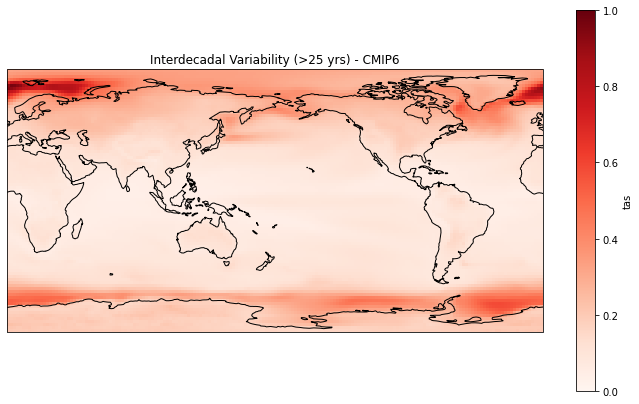

In [59]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
control_noht.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - CMIP6')

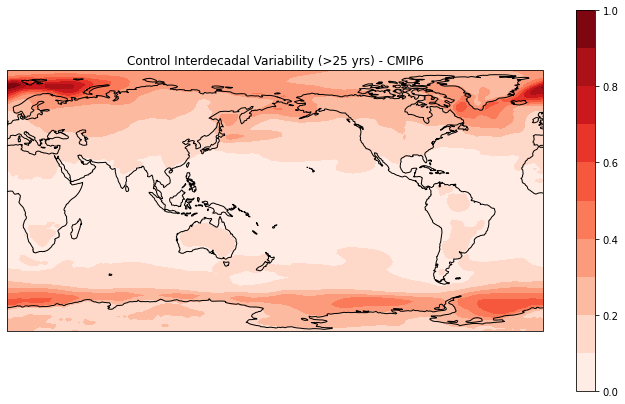

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(control_noht.lon,control_noht.lat, control_noht, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1, levels=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Interdecadal Variability (>25 yrs) - CMIP6')
plt.colorbar()

## Historical Data

In [4]:
path_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('historical'))].drop_duplicates('source_id').head(20)['path'].to_list()
path_hist

['/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM2/historical/r1i1p1f1/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/ACCESS-ESM1-5/historical/r10i1p1f1/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/AWI-CM-1-1-MR/historical/r1i1p1f1/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/AWI-ESM-1-1-LR/historical/r1i1p1f1/tas_Amon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/BCC-CSM2-MR/historical/r1i1p1f1/tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/BCC-ESM1/historical/r1i1p1f1/tas_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CAMS-CSM1-0/historical/r1i1p1f1/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CAS-ESM2-0/hist

In [6]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

dset_list_hist = []

for file in path_hist:
    name = file.removeprefix('/data/cristi/a/cristi/esm_data/cmip6/')
    print(name)
    ds = xr.open_dataset(file)
    ds_tas_rolling = ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
    ds_tas = ds_tas_rolling.std('time')
    ds_tas['name'] = name # Creating a new dimension for each ensemble member
    dset_list_hist.append(ds_tas)

ACCESS-CM2/historical/r1i1p1f1/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
ACCESS-ESM1-5/historical/r10i1p1f1/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc
AWI-CM-1-1-MR/historical/r1i1p1f1/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-201412.nc
AWI-ESM-1-1-LR/historical/r1i1p1f1/tas_Amon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_185001-201412.nc
BCC-CSM2-MR/historical/r1i1p1f1/tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc
BCC-ESM1/historical/r1i1p1f1/tas_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc
CAMS-CSM1-0/historical/r1i1p1f1/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412.nc
CAS-ESM2-0/historical/r1i1p1f1/tas_Amon_CAS-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
CESM2-FV2/historical/r1i1p1f1/tas_Amon_CESM2-FV2_historical_r1i1p1f1_gn_185001-201412.nc
CESM2-WACCM-FV2/historical/r1i1p1f1/tas_Amon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_185001-201412.nc
CESM2-WACCM/historical/r1i1p1f1/tas_Amon_CESM2-WACCM_histori

In [7]:
hist_ds = xr.concat(dset_list_hist, dim='name',coords='minimal')
hist_ds

<xarray.DataArray 'tas' (name: 20, lat: 88, lon: 179)>
array([[[0.40127718, 0.40264204, 0.40308577, ..., 0.38591246,
         0.38900126, 0.39159274],
        [0.35789035, 0.35841349, 0.35863339, ..., 0.3578244 ,
         0.35888006, 0.35868129],
        [0.3593578 , 0.35496526, 0.35035853, ..., 0.36401019,
         0.36365726, 0.3633797 ],
        ...,
        [0.53770973, 0.55026513, 0.56385401, ..., 0.4803343 ,
         0.49387419, 0.50900267],
        [0.46008108, 0.46407017, 0.46832681, ..., 0.44303209,
         0.44561443, 0.44935094],
        [0.39643165, 0.39771919, 0.39908155, ..., 0.39254368,
         0.39277715, 0.39429297]],

       [[0.27561183, 0.2760678 , 0.27639492, ..., 0.27303583,
         0.27365392, 0.27434189],
        [0.27481465, 0.27788059, 0.28022743, ..., 0.25789687,
         0.26215647, 0.26669153],
        [0.25945683, 0.25918691, 0.25924094, ..., 0.25676623,
         0.25836607, 0.25924899],
...
        [0.87987186, 0.90120267, 0.94229241, ..., 0.82403888,
         0.82403888, 0.86204772],
        [0.87835668, 0.88267395, 0.91694806, ..., 0.84434266,
         0.84739911, 0.87467241],
        [0.85841621, 0.85887265, 0.86752378, ..., 0.85069473,
         0.85436265, 0.85819745]],

       [[0.55230656, 0.55518563, 0.55825137, ..., 0.5406392 ,
         0.54288568, 0.54583278],
        [0.55107242, 0.55484676, 0.55789729, ..., 0.53365945,
         0.53764236, 0.54216078],
        [0.54424628, 0.54615078, 0.54467268, ..., 0.51631572,
         0.52443308, 0.53304564],
        ...,
        [0.50055994, 0.49990352, 0.49924032, ..., 0.50137875,
         0.50115012, 0.50109487],
        [0.47786342, 0.47847428, 0.47968717, ..., 0.48338762,
         0.48081099, 0.47941218],
        [0.49294669, 0.49280453, 0.4931068 , ..., 0.49689361,
         0.4954519 , 0.49413348]]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) <U100 'ACCESS-CM2/historical/r1i1p1f1/tas_Amon_ACCESS-CM2...

In [8]:
hist = hist_ds.mean('name')
hist.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.40416294, 0.406902  , 0.40433804, ..., 0.4034695 , 0.40019879,
        0.40166188],
       [0.39636108, 0.39988322, 0.40131991, ..., 0.38498648, 0.38842421,
        0.39262733],
       [0.40412689, 0.40686996, 0.40151155, ..., 0.39489446, 0.39471435,
        0.39563249],
       ...,
       [0.74841761, 0.75358338, 0.76077018, ..., 0.72808223, 0.73288238,
        0.74059209],
       [0.73971785, 0.74110384, 0.74502805, ..., 0.73338634, 0.73460843,
        0.73790192],
       [0.72860116, 0.72856232, 0.7293802 , ..., 0.72791005, 0.72827694,
        0.72872483]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - CMIP6')

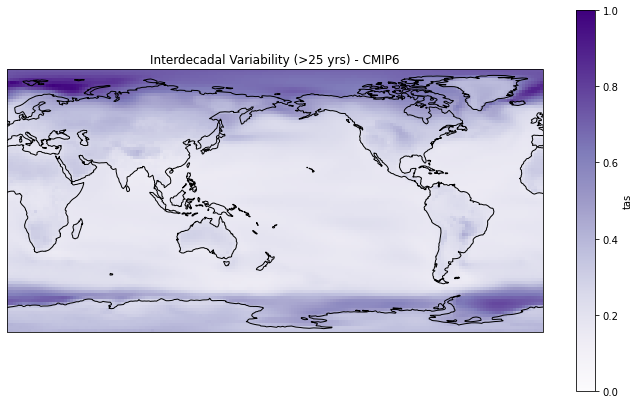

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
hist.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - CMIP6')

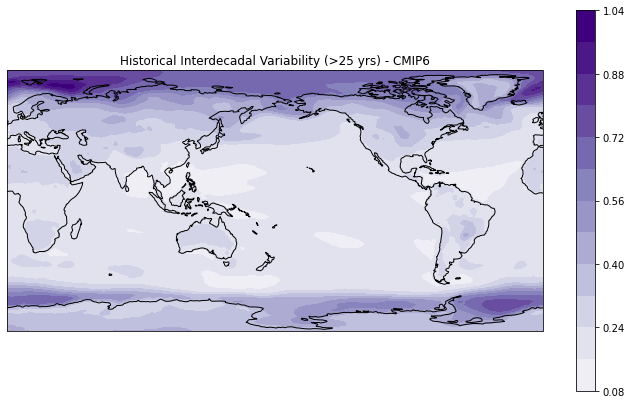

In [31]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(hist.lon,hist.lat, hist, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=1, levels=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Interdecadal Variability (>25 yrs) - CMIP6')
plt.colorbar()

## Historical - Control

In [16]:
diff_var = hist - control

Text(0.5, 1.0, 'Change in Interdecadal Variability (>25 yrs) - CMIP6')

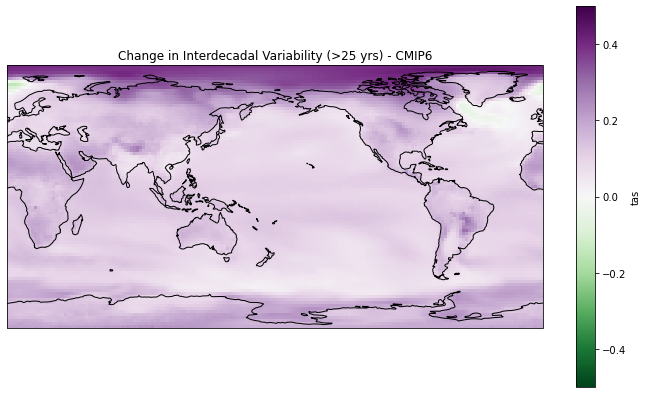

In [18]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
diff_var.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - CMIP6')

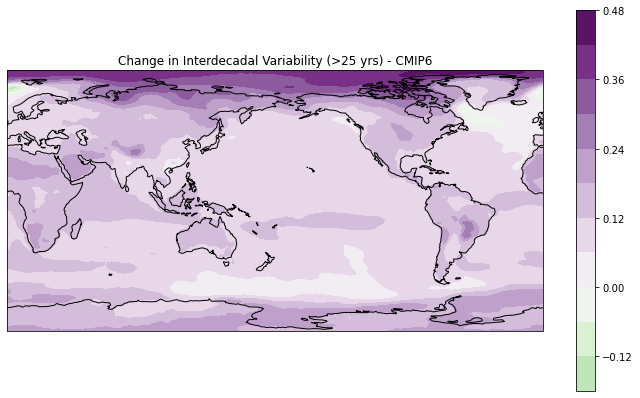

In [32]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(control_noht.lon,control_noht.lat, diff_var, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-0.5, vmax=0.5, levels=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Interdecadal Variability (>25 yrs) - CMIP6')
plt.colorbar()

## Percentage Change

In [19]:
percent_change = ((diff_var)/control)*100
percent_change

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[104.33462663, 103.5735737 , 104.73385019, ..., 101.01226598,
         93.1358892 , 100.21568365],
       [ 91.76232972,  89.29047675,  93.65526621, ...,  92.86598798,
         93.96388665,  93.60322992],
       [ 75.18185743,  76.34434885,  78.69864994, ...,  87.30507794,
         86.62499134,  85.50866135],
       ...,
       [104.67517865, 101.72784212,  98.44420306, ..., 118.06679904,
        115.88821842, 110.5932611 ],
       [116.93128705, 115.56111699, 112.84207607, ..., 125.92451082,
        123.65696621, 120.52354349],
       [126.57686519, 125.82290812, 124.74454465, ..., 129.80188644,
        128.90331395, 128.16552694]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Percentge Change in Interdecadal Variability (>25 yrs) - CMIP6')

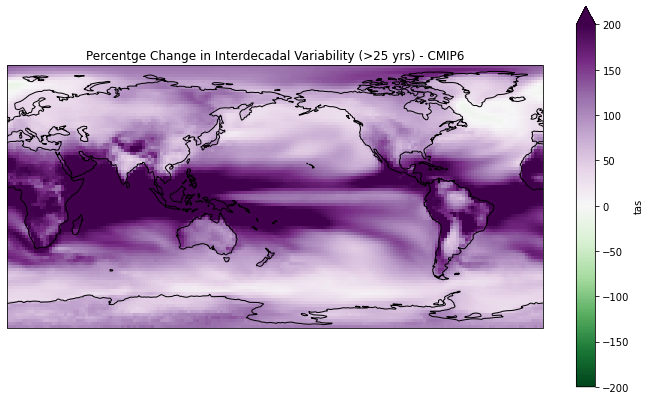

In [33]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentge Change in Interdecadal Variability (>25 yrs) - CMIP6')

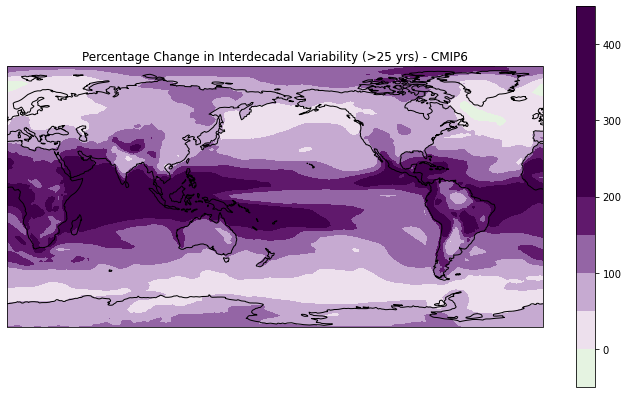

In [37]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(control_noht.lon,control_noht.lat, percent_change, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-200, vmax=200, levels=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Interdecadal Variability (>25 yrs) - CMIP6')
plt.colorbar()